<a href="https://colab.research.google.com/github/alam2018/ml_prediction_m1/blob/master/arima_pkt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Define the slice to retrive the traffic simulation file
eMBB = True

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

# Importing the training set
if eMBB == True:
  dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traffic_prediction/data_eMBB/train_data/traffic_simulation.csv', sep=';')
else:
   dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traffic_prediction/data_URLLC/traffic_simulation.csv', sep=';')
    

training_set = dataset_train.iloc[:, 1:2].values


In [0]:
#Prepare training and test dataset
prediction_size = 60
X = training_set
train_size = int (round(len(X) * 0.7))
test_size = train_size + prediction_size

train = X[0:train_size]
#test = X[train_size:test_size]  
test = X[6000:6060]
predictions = []

import itertools
p=d=q=range(0,4)
pdq = list(itertools.product(p,d,q))

#print (pdq)

#Prepare ARIMA model
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')
temp_aic = 1000000000000
temp_pdq = [(0, 0, 0)]
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
        if model_arima_fit.aic < temp_aic:
          temp_aic = model_arima_fit.aic
          temp_pdq = param
    except:
        continue

print (temp_pdq, temp_aic)


(0, 0, 0) 176569.13693900863
(0, 0, 1) 176570.80916691336
(0, 0, 2) 175727.8970315544
(0, 0, 3) 172531.71400145284
(0, 1, 0) 181454.01120194266
(0, 1, 1) 175005.43757074163
(0, 2, 0) 189075.81074465427
(0, 2, 1) 181440.23769512164
(1, 0, 0) 176570.82391106506
(1, 0, 1) 175547.87476627284
(1, 0, 2) 175318.80048930782
(1, 0, 3) 172532.12860586116
(1, 1, 0) 179545.9619595333
(1, 1, 1) 174191.7498127423
(1, 1, 2) 174348.71957657905
(1, 1, 3) 172138.22084573336
(1, 2, 0) 186919.66503042338
(2, 0, 0) 176567.14381749896
(2, 0, 1) 174692.86343509128
(2, 0, 2) 171638.12941877346
(2, 0, 3) 169406.53587069357
(2, 1, 0) 167913.57501298553
(2, 1, 1) 167885.07626374986
(2, 1, 2) 167799.67918604362
(2, 1, 3) 166148.6409381011
(2, 2, 0) 171641.79207060213
(2, 2, 1) 167903.91542580398
(2, 2, 2) 167875.45252799988
(3, 0, 0) 167739.75034522155
(3, 0, 1) 167678.19694200464
(3, 0, 2) 167233.35892900667
(3, 0, 3) 166161.09273144562
(3, 1, 0) 167884.7655996786
(3, 1, 1) 167886.6962676694
(3, 1, 2) 167222.848

In [0]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
#model_arima = ARIMA(train,order=(9, 1, 8))
model_arima = ARIMA(train,order=temp_pdq)
model_arima_fit = model_arima.fit(disp=0)
#print(model_arima_fit.aic)

predictions= model_arima_fit.forecast(steps=prediction_size)[0]

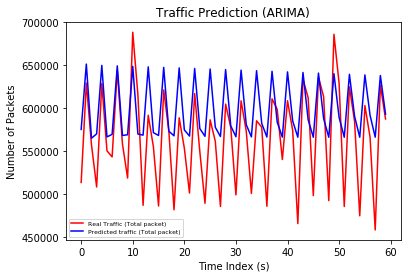

In [0]:
#plt.plot(test)
#plt.plot(predictions,color='red')

# Visualising the results
plt.plot(test, color = 'red', label = 'Real Traffic (Total packet)')
plt.plot(predictions, color = 'blue', label = 'Predicted traffic (Total packet)')
plt.title('Traffic Prediction (ARIMA)')
plt.xlabel('Time Index (s)')
plt.ylabel('Number of Packets')
plt.legend(loc='best', prop={'size': 6})

plt.savefig('arima_valData_pkt.png',bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

from math import sqrt

mse = mean_squared_error(test, predictions)

rmse = sqrt(mse)

print('RMSE: %f' % rmse)


#print (predictions.shape)
X_test = np.reshape(test, (np.product(test.shape),))

df = pd.DataFrame(list(zip(X_test, predictions)),
              columns=['Test Packet Size (bytes)','Predicted Packet Size (bytes)'])

df.to_csv("arima_data.csv", index = None, header=True)

#print (df)

RMSE: 49347.776796
